- 간단한 수준의 preprocessing을 적용하면서 성능상의 개선을 기대했으나 잘 나오지 않음
- 튜닝과 일반적으로 성능이 더 좋은 모델들을 도입 -> 성능 개선
- 큰 고민은 없이 lightgbm 모델 채택
- evaluation metric 함수화

In [1]:
from glob import glob

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_path = "../take-home-interview/"

In [3]:
app = pd.read_csv(data_path + "loan_application.csv")

In [4]:
app

,application_id_current,target,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_113,col_114,col_115,col_116,col_117,col_118,col_119,col_120,col_121,type
0,100002,1.0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,...,3,1,8,6,5,2,0,5,0,train
1,100003,0.0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,...,1,1,3,1,39,2,0,0,0,train
2,100004,0.0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,...,3,1,8,1,11,4,3,7,2,train
3,100006,0.0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,...,0,1,8,6,5,4,3,7,2,train
4,100007,0.0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,...,3,1,3,4,37,4,3,7,2,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48739,456221,NaN,0,121500.0,412560.0,17473.5,270000.0,0.002042,-19970,-5169,...,5,1,18,6,33,4,3,7,2,test
48740,456222,NaN,2,157500.0,622413.0,31909.5,495000.0,0.035792,-11186,-1149,...,1,1,14,1,51,4,3,7,2,test
48741,456223,NaN,1,202500.0,315000.0,33205.5,315000.0,0.026392,-15922,-3037,...,1,1,18,6,5,4,0,5,0,test
48742,456224,NaN,0,225000.0,450000.0,25128.0,450000.0,0.018850,-13968,-2731,...,1,1,10,1,42,4,0,4,0,test


In [5]:
df = app[app['type'] == 'train'].drop('type', axis=1)

### train test split

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(['application_id_current', 'target'], axis=1), df['target'], test_size=0.2
)

## Evaluation

In [7]:
import evaluate_with_lightgbm

In [8]:
auc_dic = {}

### evaluate without any preprocess

/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] Number of positive: 15927, number of negative: 180879
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018631 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11297
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 115
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080927 -> initscore=-2.429813
[LightGBM] [Info] Start training from score -2.429813
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.735546
[4

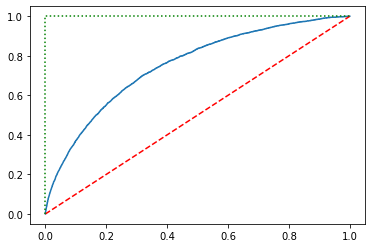

AUC on test: 0.7522
f1_score on test: 0.2680


In [9]:
auc_dic['no_preprocess'] = evaluate_with_lightgbm.run(X_train, X_test, y_train, y_test)

/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] Number of positive: 15975, number of negative: 180831
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.027983 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11362
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 115
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081171 -> initscore=-2.426538
[LightGBM] [Info] Start training from score -2.426538
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.742925
[4

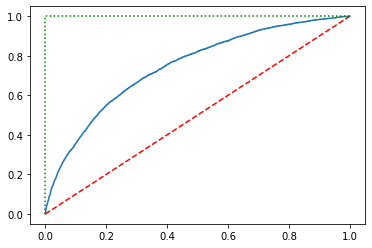

AUC on test: 0.7452
f1_score on test: 0.2613


In [10]:
auc_dic['no_preprocess_feature_select'] = evaluate_with_lightgbm.run(X_train, X_test, y_train, y_test, X_train.shape[1] // 5)

## Preprocess

In [11]:
import preprocess

### remove meaningless features

In [12]:
X_train.shape, X_test.shape

((246008, 120), (61503, 120))

In [13]:
X_train, X_test = preprocess.remove_single_test_features(X_train, X_test)

In [14]:
X_train.shape, X_test.shape

((246008, 119), (61503, 119))

/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] Number of positive: 15975, number of negative: 180831
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.013519 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11283
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 115
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081171 -> initscore=-2.426538
[LightGBM] [Info] Start training from score -2.426538
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.737593
[4

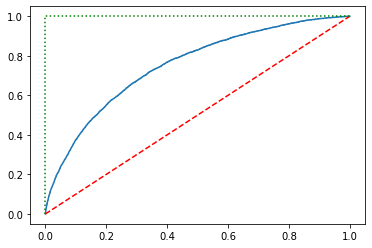

AUC on test: 0.7513
f1_score on test: 0.2680


In [15]:
auc_dic['remove_meaningless_features'] = evaluate_with_lightgbm.run(X_train, X_test, y_train, y_test)

### one hot encode

In [16]:
col_cate = preprocess.detect_cate_features(X_train, X_test)

In [17]:
X_train_dummy, X_test_dummy = preprocess.one_hot_encode_cate_features(
    X_train, X_test, col_cate)

8가지 카테고리 제거 -> 15개의 관측치를 예외 케이스로 변경
10가지 카테고리 제거 -> 35개의 관측치를 예외 케이스로 변경
3가지 카테고리 제거 -> 3개의 관측치를 예외 케이스로 변경
10가지 카테고리 제거 -> 33개의 관측치를 예외 케이스로 변경
3가지 카테고리 제거 -> 5개의 관측치를 예외 케이스로 변경
2가지 카테고리 제거 -> 9개의 관측치를 예외 케이스로 변경
3가지 카테고리 제거 -> 15개의 관측치를 예외 케이스로 변경
4가지 카테고리 제거 -> 13개의 관측치를 예외 케이스로 변경
2가지 카테고리 제거 -> 11개의 관측치를 예외 케이스로 변경


/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] Number of positive: 16011, number of negative: 180795
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028455 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11483
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 260
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.081354 -> initscore=-2.424088
[LightGBM] [Info] Start training from score -2.424088
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.740166
[4

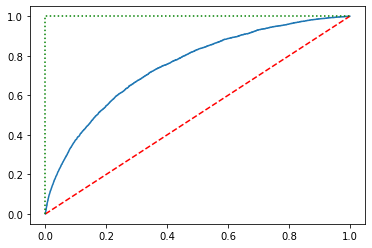

AUC on test: 0.7502
f1_score on test: 0.2646


In [20]:
auc_dic['one_hot_encoded'] = evaluate_with_lightgbm.run(X_train_dummy, X_test_dummy, y_train, y_test)

### remove edge cates

In [21]:
X_train_edge_removed, X_test_edge_removed = preprocess.remove_edge_cates(X_train_dummy, X_test_dummy, y_train, y_test, rare_threshold=0.001)

제거할 칼럼 수: 7


/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] Number of positive: 15874, number of negative: 180932
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.041921 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11472
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 260
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080658 -> initscore=-2.433439
[LightGBM] [Info] Start training from score -2.433439
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.737464
[4

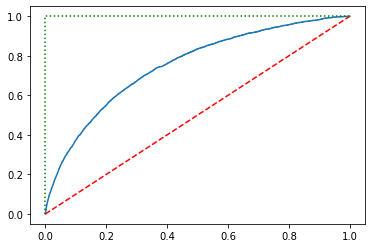

AUC on test: 0.7504
f1_score on test: 0.2698


In [22]:
auc_dic['remove_edge_cates'] = evaluate_with_lightgbm.run(X_train_edge_removed, X_test_edge_removed, y_train, y_test)

/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/Users/dane.ahn/anaconda3/lib/python3.8/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] Number of positive: 15854, number of negative: 180952
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.039457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11409
[LightGBM] [Info] Number of data points in the train set: 196806, number of used features: 263
[LightGBM] [Warning] objective is set=binary, application=binary will be ignored. Current value: objective=binary
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080556 -> initscore=-2.434810
[LightGBM] [Info] Start training from score -2.434810
Training until validation scores don't improve for 100 rounds
[20]	valid_0's auc: 0.7423
[40]

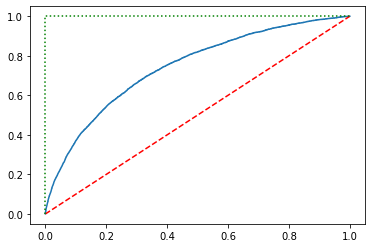

AUC on test: 0.7429
f1_score on test: 0.2633


In [24]:
auc_dic['remove_edge_cates_feature_selected'] = evaluate_with_lightgbm.run(X_train_dummy, X_test_dummy, y_train, y_test, X_train_dummy.shape[1] // 5)

### Final result

In [25]:
pd.Series(auc_dic).sort_values().reset_index()

,index,0
0,remove_edge_cates_feature_selected,0.742907
1,no_preprocess_feature_select,0.745168
2,one_hot_encoded,0.750181
3,remove_edge_cates,0.750431
4,remove_meaningless_features,0.751304
5,no_preprocess,0.752189
